<a href="https://colab.research.google.com/github/bautiaraujo/bautiaraujo/blob/main/TPFINAL_PROG_DS_ARAUJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DEL RENDIMIENTO ESTUDIANTIL**
Autor: Araujo, Bautista

## **INTRODUCCIÓN**
El objetivo de este trabajo práctico es realizar un análisis exhaustivo del rendimiento estudiantil utilizando el lenguaje de programación R. Para ello, se empleará un dataset de rendimiento de estudiantes, el cual se importará desde un archivo CSV. A lo largo del análisis se realizarán diversas visualizaciones, análisis numéricos y se aplicarán técnicas de regresión lineal y clustering.

## **DESCRIPCIÓN DEL DATASET**
El dataset utilizado en este análisis es "StudentsPerformance.csv". Este dataset contiene información sobre el rendimiento de estudiantes en diversas áreas, incluyendo puntajes en matemáticas, lectura y escritura, así como otros factores demográficos.


## **IMPORTACIÓN Y VISUALIZACION DE DATOS**
Librerias necesarias

In [1]:
# Instala y carga paquetes necesarios
if (!requireNamespace("corrplot", quietly = TRUE)) {
    install.packages("corrplot")
}
if (!requireNamespace("gridExtra", quietly = TRUE)) {
    install.packages("gridExtra")
}
if (!requireNamespace("factoextra", quietly = TRUE)) {
    install.packages("factoextra")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [2]:
library(ggplot2)     # Para visualización de datos
library(dplyr)       # Para manipulación de datos
library(readr)       # Para importar datos desde CSV
library(corrplot)    # Para visualización de matrices de correlación
library(gridExtra)   # Para organizar múltiples gráficos
library(cluster)     # Para análisis de clustering
library(factoextra)  # Para visualización de clustering


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Importar el dataset desde un archivo CSV

In [3]:
file_path <- "StudentsPerformance.csv"
data <- read_csv(file_path)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race_ethnicity, parental_level_of_education, lunch, test_pr...
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Visualización de los primeros registros del dataset

In [4]:
head(data)

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


## **ANÁLISIS DESCRIPTIVO**
Se calculan estadísticas descriptivas básicas (media, desviación estándar, mediana) para las variables de puntaje

In [5]:
desc_stats <- data %>%
  summarise(across(ends_with("score"), list(mean = mean, sd = sd, median = median), na.rm = TRUE))
desc_stats

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(...)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


math_score_mean,math_score_sd,math_score_median,reading_score_mean,reading_score_sd,reading_score_median,writing_score_mean,writing_score_sd,writing_score_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
66.089,15.16308,66,69.169,14.60019,70,68.054,15.19566,69


## **ANÁLISIS DE FRECUENCIAS**
Se cuenta el número de estudiantes según el nivel de educación de los padres

In [6]:
education_counts <- data %>%
  group_by(parental_level_of_education) %>%
  summarise(count = n())

 Gráfico de barras para mostrar el conteo de estudiantes por nivel de educación de los padres

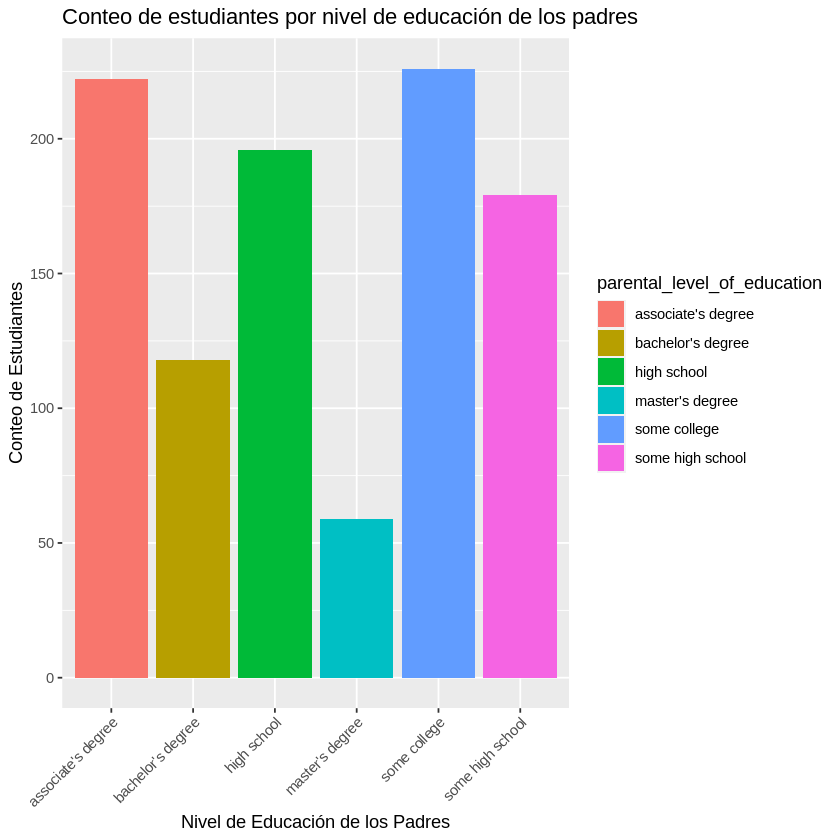

In [7]:
ggplot(education_counts, aes(x = parental_level_of_education, y = count, fill = parental_level_of_education)) +
  geom_bar(stat = "identity") +
  labs(title = "Conteo de estudiantes por nivel de educación de los padres",
       x = "Nivel de Educación de los Padres",
       y = "Conteo de Estudiantes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Observamos que hay una mayor proporción de estudiantes cuyos padres tienen un nivel de educación universitaria.

## **CORRELACIONES**
Se calcula la matriz de correlación para las variables de puntajes (matemáticas, lectura y escritura)

In [8]:
correlation_matrix <- data %>%
  select(ends_with("score")) %>%
  cor(use = "complete.obs")

Visualización de la matriz de correlación

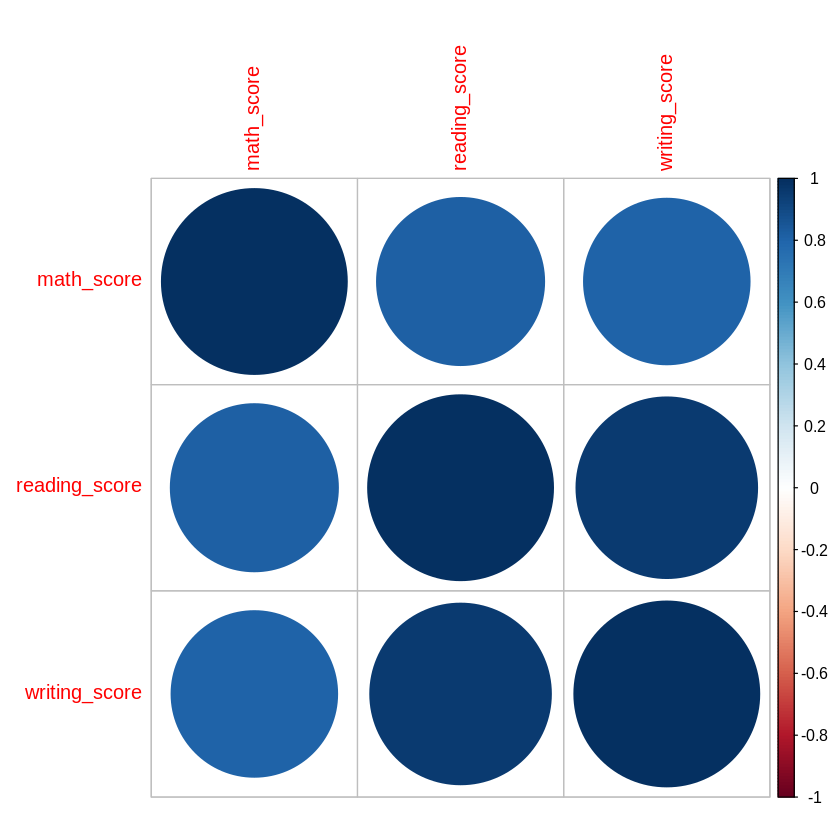

In [9]:
corrplot(correlation_matrix, method = "circle")

Este gráfico circular muestra la relación entre los puntajes de matemáticas, lectura y escritura.
Los colores indican la fuerza y la dirección de las correlaciones.  
Observamos una fuerte correlación positiva entre los puntajes de lectura y escritura, lo cual es esperado ya que ambas habilidades están relacionadas.

## **REGRESIÓN LINEAL**
Se ajusta un modelo de regresión lineal para predecir el puntaje de matemáticas basado en los puntajes de lectura, escritura y el género

In [10]:
linear_model <- lm(math_score ~ reading_score + writing_score + gender, data = data)
summary(linear_model)


Call:
lm(formula = math_score ~ reading_score + writing_score + gender, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.739  -3.958   0.008   4.164  17.931 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6.18922    1.02169  -6.058 1.95e-09 ***
reading_score  0.38212    0.04462   8.564  < 2e-16 ***
writing_score  0.58064    0.04360  13.318  < 2e-16 ***
gendermale    13.13781    0.40710  32.271  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.062 on 996 degrees of freedom
Multiple R-squared:  0.8406,	Adjusted R-squared:  0.8401 
F-statistic:  1751 on 3 and 996 DF,  p-value: < 2.2e-16


Predicciones del modelo

In [11]:
data$predicted_math_score <- predict(linear_model, data)

Gráfico de Predicciones

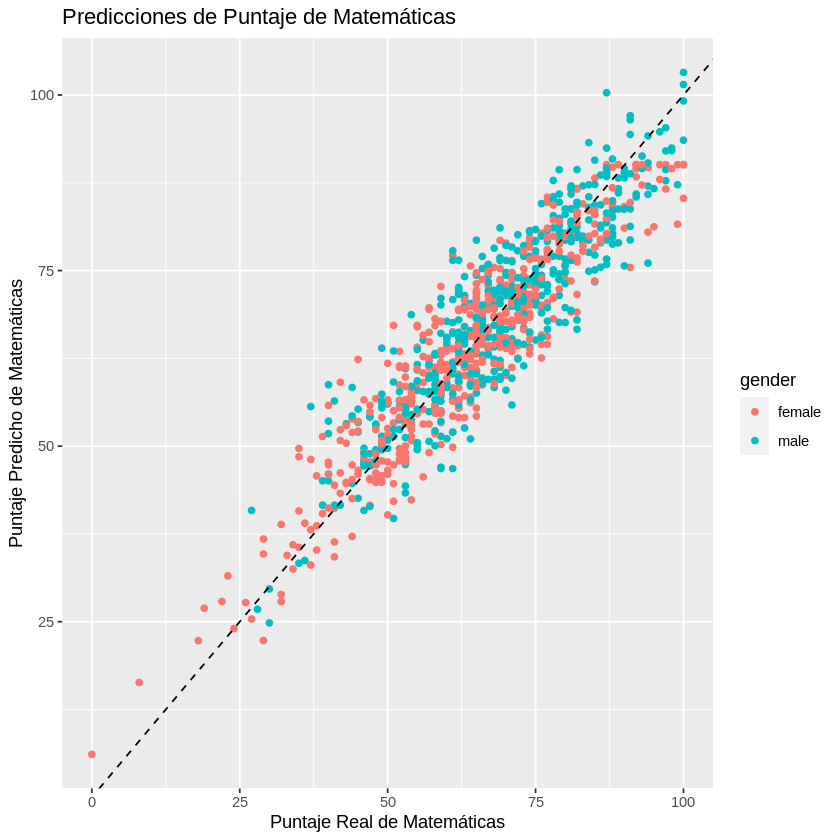

In [12]:
ggplot(data, aes(x = math_score, y = predicted_math_score, color = gender)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(title = "Predicciones de Puntaje de Matemáticas",
       x = "Puntaje Real de Matemáticas",
       y = "Puntaje Predicho de Matemáticas")

Este gráfico compara los puntajes reales de matemáticas con los predichos por el modelo. La línea discontinua representa la predicción.  
Observamos que el modelo predice razonablemente bien, aunque hay algunas desviaciones. También notamos que no hay una gran diferencia entre géneros.

## **GRÁFICO DE CLÚSTERES**
Se aplica el algoritmo de K-means para agrupar a los estudiantes en 3 clústeres basados en sus puntajes

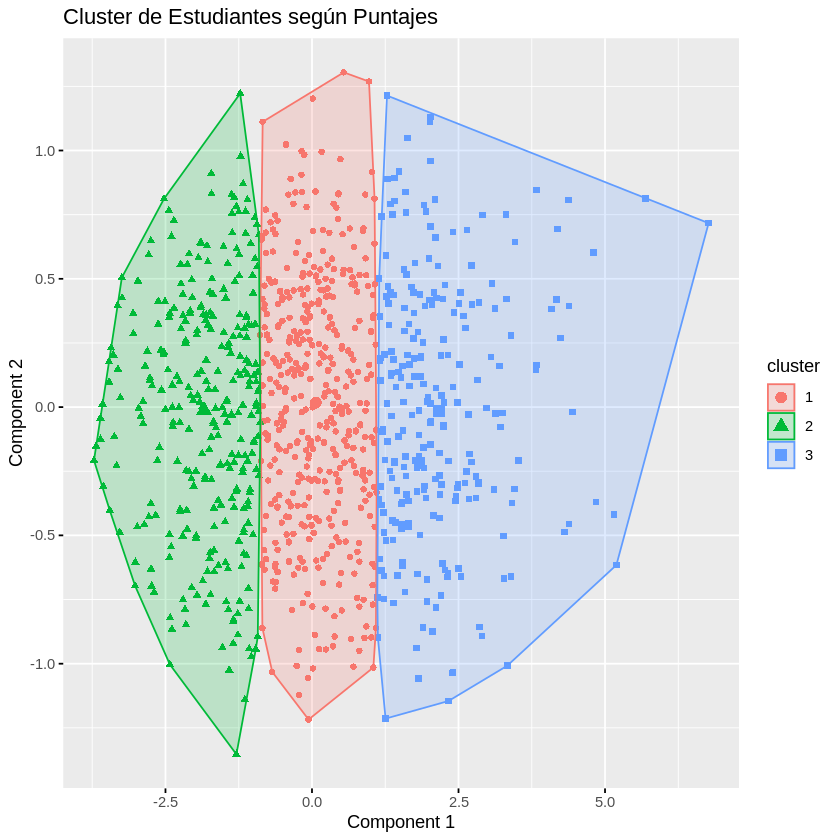

In [13]:
set.seed(123)
kmeans_result <- kmeans(scale(data %>% select(math_score, reading_score, writing_score)), centers = 3)
data$cluster <- as.factor(kmeans_result$cluster)
fviz_cluster(kmeans_result, data = scale(data %>% select(math_score, reading_score, writing_score)),
             geom = "point", stand = FALSE) +
  labs(title = "Cluster de Estudiantes según Puntajes",
       x = "Component 1",
       y = "Component 2")

 Este gráfico muestra la agrupación de los estudiantes en 3 clústeres según sus puntajes.
Cada punto representa a un estudiante y los colores indican los diferentes clústeres.  
Observamos que hay 3 grupos distintivos: un grupo de alto rendimiento, un grupo de rendimiento medio y un grupo de bajo rendimiento.

## **TABLAS DE CONTINGENCIA**
Se crea una tabla de contingencia para observar la relación entre el género y el curso de preparación para el examen

In [14]:
contingency_table <- table(data$gender, data$test_preparation_course)
contingency_table

        
         completed none
  female       184  334
  male         174  308

Esta tabla muestra la frecuencia de estudiantes según su género y si tomaron o no un curso de preparación para el examen.

## **CONCLUSIONES**
En conclusión, este análisis nos permite obtener una visión detallada del rendimiento estudiantil y cómo varios factores pueden influir en los puntajes de los estudiantes.

* A través del análisis descriptivo, observamos que los estudiantes cuyos padres
tienen un nivel de educación secundaria y universitaria son los más representados.

* La matriz de correlación muestra una fuerte correlación entre los puntajes de lectura y escritura, lo que sugiere que estas habilidades están estrechamente relacionadas.

* El modelo de regresión lineal nos indica que los puntajes de lectura y escritura son buenos predictores del puntaje de matemáticas, y no se observa una gran diferencia en los puntajes predichos entre géneros.

* El análisis de clustering revela tres grupos distintivos de estudiantes según su rendimiento: alto, medio y bajo.

* Las tablas de contingencia muestran una mayor proporción de mujeres que completaron el curso de preparación en comparación con los hombres.